## Project Probability: Health Insurance Data Analysis 
by DM Erdy Kusuma

## Background & Objective

Sebuah perusahaan asuransi kesehatan ingin menganalisa lebih lanjut tentang data tagihan kesehatan para nasabah dan korelasi antar variabelnya. Data ini terdiri dari 7 tabel: age, sex, bmi, children, smoker, charges.

Perusahaan ingin mengetahui:

**1. Analisa statistik deskriptif**

- Berapa rata-rata umur nasabah?
- Berapa rata-rata umur nasabah yang merokok?
- Mana rata-rata tagihan yang lebih tinggi, nasabah perokok atau non-perokok?
- Mana rata-rata BMI yang lebih tinggi, nasabah perokok atau non perokok? 
- Mana rata-rata tagihan yang lebih tinggi, nasabah perokok dengan BMI lebih besar dari 25 atau nasabah perokok dengan BMI lebih kecil dari 25?

**2. Analisa variabel diskrit**
- Gender mana yang memiliki rata-rata tagihan paling tinggi?
- Berapa peluang tagihan di tiap-tiap region?
- Berapa proporsi nasabah perokok dan non-perokok?
- Berapa peluang seseorang adalah perempuan diketahui dia adalah perokok?
- Berapa peluang seseorang adalah laki-laki diketahui dia adalah perokok?

**3. Analisa variabel kontinu**

Mana yang lebih mungkin terjadi

- Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k **atau**
- Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k

Mana yang lebih mungkin terjadi

- Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k **atau**
- Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k

**4. Analisa korelasi**
- Bagaimana korelasi tagihan kesehatan dengan kebiasaan merokok?
- Bagaimana korelasi tagihan kesehatan dengan BMI?
- Bagaimana korelasi tagihan kesehatan dengan umur?
- Bagaimana visual korelasi tagihan kesehatan dengan kebiasaan merokok dan BMI?

**5. Pengujian hipotesis**
- Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok
- Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25
- Tagihan kesehatan laki-laki lebih besar dari perempuan


## Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import numpy as np
from scipy import stats


data = pd.read_csv('insurance.csv')
data.dtypes


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [2]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### 1. Analisa Deskriptif

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [4]:
#1 Rata-rata umur keseluruhan data
avg_age = data['age'].mean()
print(f'Rata-rata umur keseluruhan data: {avg_age:.2f}')

Rata-rata umur keseluruhan data: 39.21


In [5]:
#2 Rata-rata umur perokok
smoker_yes = data[data['smoker'] == 'yes']
avg_age_smoker = smoker_yes['age'].mean()
print(f'Rata-rata umur perokok: {avg_age_smoker:.2f}')


Rata-rata umur perokok: 38.51


In [6]:
#3 Membandingkan rata-rata tagihan perokok vs non-perokok
smoker_no = data[data['smoker'] == 'no']

avg_charges_smoker = smoker_yes['charges'].mean()
avg_charges_smoker_no = smoker_no['charges'].mean()
print(f'Rata-rata tagihan perokok: {avg_charges_smoker:.2f}')
print(f'Rata-rata tagihan non-perokok: {avg_charges_smoker_no:.2f}')
print(f'\n---------------------------------------')    
if avg_charges_smoker < avg_charges_smoker_no:
    print(f'Rata-rata tagihan perokok LEBIH KECIL dari tagihan non-perokok')
elif  avg_charges_smoker > avg_charges_smoker_no:
    print(f'Rata-rata tagihan perokok LEBIH BESAR dari tagihan non-perokok')
else:
    print(f'Rata-rata tagihan perokok SAMA DENGAN tagihan non-perokok')



Rata-rata tagihan perokok: 32050.23
Rata-rata tagihan non-perokok: 8434.27

---------------------------------------
Rata-rata tagihan perokok LEBIH BESAR dari tagihan non-perokok


In [7]:
#4. Membandingkan rata-rata BMI perokok vs non-perokok
avg_bmi_smoker_yes = smoker_yes['bmi'].mean()
avg_bmi_smoker_no = smoker_no['bmi'].mean()
print(f'Rata-rata BMI perokok: {avg_bmi_smoker_yes:.2f}\nRata-rata BMI non-perokok: {avg_bmi_smoker_no:.2f}')
print(f'\n---------------------------------------')    

if avg_bmi_smoker_yes > avg_bmi_smoker_no:
    print(f'Rata-rata BMI perokok LEBIH BESAR dari BMI non-perokok')
elif  avg_bmi_smoker_yes < avg_bmi_smoker_no:
    print(f'Rata-rata BMI perokok LEBIH KECIL dari BMI non-perokok')
else:
    print(f'Rata-rata BMI perokok SAMA DENGAN dari BMI non-perokok')


Rata-rata BMI perokok: 30.71
Rata-rata BMI non-perokok: 30.65

---------------------------------------
Rata-rata BMI perokok LEBIH BESAR dari BMI non-perokok


In [8]:
#5. Rata-rata tagihan perokok BMI > 25 vs perokok BMI < 25

bmi_smoker_more25 = data[(data['smoker'] == 'yes') & (data['bmi'] > 25)]
avg_bmi_smoker_more25 = bmi_smoker_more25['charges'].mean()

bmi_smoker_less25 = data[(data['smoker'] == 'yes') & (data['bmi'] < 25)]
avg_bmi_smoker_less25 = bmi_smoker_less25['charges'].mean()

print(f'Rata-rata tagihan perokok dengan BMI > 25: {avg_bmi_smoker_more25:.2f}')
print(f'Rata-rata tagihan perokok dengan BMI < 25: {avg_bmi_smoker_less25:.2f}')
print(f'\n---------------------------------------')    
if avg_bmi_smoker_more25 < avg_bmi_smoker_less25:
    print(f'Rata-rata tagihan perokok (dg BMI > 25) LEBIH KECIL dari tagihan perokok (dg BMI < 25)')
elif  avg_bmi_smoker_more25 > avg_bmi_smoker_less25:
    print(f'Rata-rata tagihan perokok (dg BMI > 25) LEBIH BESAR dari tagihan perokok (dg BMI < 25)')
else:
    print(f'Rata-rata tagihan perokok (dg BMI > 25) SAMA DENGAN dari tagihan perokok (dg BMI < 25)')



Rata-rata tagihan perokok dengan BMI > 25: 35116.91
Rata-rata tagihan perokok dengan BMI < 25: 19839.28

---------------------------------------
Rata-rata tagihan perokok (dg BMI > 25) LEBIH BESAR dari tagihan perokok (dg BMI < 25)


### 2. Analisa Diskrit

In [27]:
#1 Rata-rata tagihan berdasarkan gender (menggunakan groupby bisa lebih singkat)
charges_by_sex = data.groupby('sex')['charges'].mean()
print(f'Rata-rata tagihan berdasar {charges_by_sex.round(2)}')

Rata-rata tagihan berdasar sex
female    12569.58
male      13956.75
Name: charges, dtype: float64


In [10]:
#2 Distribusi peluang kemunculan data tiap region
data_by_region = data.groupby('region').size().sort_values(ascending=False) / len(data)
print(f'Peluang kemunculan data per {data_by_region.round(2)}')

Peluang kemunculan data per region
southeast    0.27
northwest    0.24
southwest    0.24
northeast    0.24
dtype: float64


In [28]:
#3 Proporsi perokok dan non-perokok
data_by_smoker = (data.groupby('smoker').size() / len(data))*100
print(f'Proporsi non-smoker vs {data_by_smoker.round(2)}')

Proporsi non-smoker vs smoker
no     79.52
yes    20.48
dtype: float64


In [29]:
#4 Peluang seseorang adalah perempuan diketahui dia adalah perokok 
# P(sex = female | smoker = yes ) = P(sex = female & smoker = yes ) / P(smoker = yes)
p_smoke_yes = len(smoker_yes)/ len(data)

#condition female(f) & smoker(s)
cond_fs = (data['sex'] == 'female') & (data['smoker'] == 'yes')
p_female_and_smoker = len(data[cond_fs])/ len(data)

p_female_given_smoker = p_female_and_smoker / p_smoke_yes
print(f'Peluang seseorang itu perempuan diketahui perokok:{p_female_given_smoker:.2f}')

SyntaxError: unterminated string literal (detected at line 10) (4254729001.py, line 10)

In [13]:
#5 Peluang seseorang adalah laki-laki diketahui dia adalah perokok 
# P(sex = male | smoker = yes ) = P(sex = male & smoker = yes ) / P(smoker = yes)

#male(m) & smoker(s)
condition_ms = (data['sex'] == 'male') & (data['smoker'] == 'yes')
p_male_and_smoker = len(data[condition_ms])/ len(data)

p_male_given_smoker = p_male_and_smoker / p_smoke_yes
print(f'Peluang seseorang itu laki-laki diketahui perokok: {p_male_given_smoker:.2f}')



Peluang seseorang itu laki-laki diketahui perokok: 0.58


### 3. Analisa Kontinu

**Menghitung peluang data kontinu dengan CDF**

In [42]:
#Perhitungan peluang dengan CDF
print('Hasil Perhitungan CDF')

#1 BMI > 25 dg tagihan lebih dari 16.7k vs BMI =< 25 dg tagihan lebih dari 16.7k

#1a. BMI > 25 dg tagihan lebih dari 16.7k
bmi_chargesA = data[(data['bmi']>25) & (data['charges']> 16700)]

#mendapatkan nilai rata-rata
meanA = bmi_chargesA['bmi'].mean()

#mendapatkan nilai standar deviasi
stdA = bmi_chargesA['bmi'].std()

#threshold BMI
x = 25

#menghitung standarisasi data
ZA = (x-meanA)/stdA

#menghitung nilai CDF di atas nilai X
pA = 1-norm.cdf(ZA)
print(f'Peluang BMI > 25 dengan tagihan > 16.7k: {pA:.2f}')


#1b. BMI =< 25 dg tagihan lebih dari 16.7k
bmi_chargesB = data[(data['bmi']<=25) & (data['charges']> 16700)]

meanB = bmi_chargesB['bmi'].mean()
stdB = bmi_chargesB['bmi'].std()
ZB = (x-meanB)/stdB

#menghitung nilai CDF di bawah nilai X
pB = norm.cdf(ZB)
print(f'Peluang BMI <= 25 dengan tagihan > 16.7k: {pB:.2f}')



Hasil Perhitungan CDF
Peluang BMI > 25 dengan tagihan > 16.7k: 0.94
Peluang BMI <= 25 dengan tagihan > 16.7k: 0.86


In [45]:
#2 Kemungkinan perokok BMI > 25 tagihan lebih dari 16.7k vs non-perokok BMI > 25 tagihan lebih dari 16.7k

#2a CDF perokok BMI > 25 tagihan lebih dari 16.7k

smoker_bmi_chargesA = data[(data['smoker'] == "yes") & (data['bmi']>25) & (data['charges']> 16700) ]

mean2A = smoker_bmi_chargesA['bmi'].mean()
std2A = smoker_bmi_chargesA['bmi'].std()
Z2A = (x-mean2A)/std2A

#menghitung nilai CDF di atas nilai X
p2A = 1-norm.cdf(Z2A)
print(f'Peluang perokok dengan BMI > 25 dan tagihan > 16.7k: {p2A:.2f}')



#2b CDF non-perokok BMI > 25 tagihan lebih dari 16.7k
smoker_bmi_chargesB = data[(data['smoker'] == "no") & (data['bmi']>25) & (data['charges']> 16700) ]

mean2B = smoker_bmi_chargesB['bmi'].mean()
std2B = smoker_bmi_chargesB['bmi'].std()
Z2B = (x-mean2B)/std2B

# menghitung nilai CDF di atas nilai X
p2B = 1-norm.cdf(Z2B)
print(f'Peluang non-perokok dengan BMI > 25 dan tagihan > 16.7k: {p2B:.2f}')

#### HASILNYA MASIH PERLU DITELAAH

Peluang perokok dengan BMI > 25 dan tagihan > 16.7k: 0.94
Peluang non-perokok dengan BMI > 25 dan tagihan > 16.7k: 0.96


**Menghitung peluang data kontinu dengan pendekatan diskrit**


In [34]:
#1 BMI > 25 dg tagihan lebih dari 16.7k vs BMI =< 25 dg tagihan lebih dari 16.7k
#1a. BMI > 25 dg tagihan lebih dari 16.7k
p_bmi_chargesA = len(bmi_chargesA) / len(data)

#1b. BMI < 25 dg tagihan lebih dari 16.7k
p_bmi_chargesB = len(bmi_chargesB) / len(data)

print(f'Peluang BMI > 25 dg tagihan > 16.7k: {p_bmi_chargesA:.2f}')
print(f'Peluang BMI <= 25 dg tagihan > 16.7k: {p_bmi_chargesB:.2f}')



Peluang BMI > 25 dg tagihan > 16.7k: 0.21
Peluang BMI <= 25 dg tagihan > 16.7k: 0.04


In [47]:
#2 Kemungkinan perokok BMI > 25 tagihan lebih dari 16.7k vs non-perokok BMI <= 25 tagihan lebih dari 16.7k
#2a. CDF perokok BMI > 25 tagihan lebih dari 16.7k
p_smoker_bmi_chargesA = len(smoker_bmi_chargesA)/ len(data)

#2b. CDF non-perokok BMI > 25 tagihan lebih dari 16.7k
p_smoker_bmi_chargesB = len(smoker_bmi_chargesB)/ len(data)

print(f'Peluang perokok dg BMI > 25 memiliki tagihan > 16.7k: {p_smoker_bmi_chargesA:.2f}')
print(f'Peluang non-perokok dg BMI > 25 memiliki tagihan > 16.7k: {p_smoker_bmi_chargesB:.2f}')

Peluang perokok dg BMI > 25 memiliki tagihan > 16.7k: 0.16
Peluang non-perokok dg BMI > 25 memiliki tagihan > 16.7k: 0.05


### 4. Analisa Korelasi dan Visualisasi

In [18]:
# Menghitung korelasi secara manual

# korelasi antara 'charges' dan 'smoker' ('smoker' adalah variabel biner)
corr_smoker_charges = data['charges'].corr(data['smoker'].map({'yes': 1, 'no': 0}))

# korelasi antara 'charges' dan 'bmi'
corr_bmi_charges = data['charges'].corr(data['bmi'])

# korelasi antara 'charges' dan 'age'
corr_age_charges = data['charges'].corr(data['age'])

# Cetak hasil korelasi
print(f'Korelasi antara tagihan dan kebiasaan merokok: {corr_smoker_charges:.3f}')
print(f'Korelasi antara tagihan dan BMI: {corr_bmi_charges:.3f}')
print(f'Korelasi antara charges dan children:{corr_age_charges:.3f}')


Korelasi antara tagihan dan kebiasaan merokok: 0.787
Korelasi antara tagihan dan BMI: 0.198
Korelasi antara charges dan children:0.299


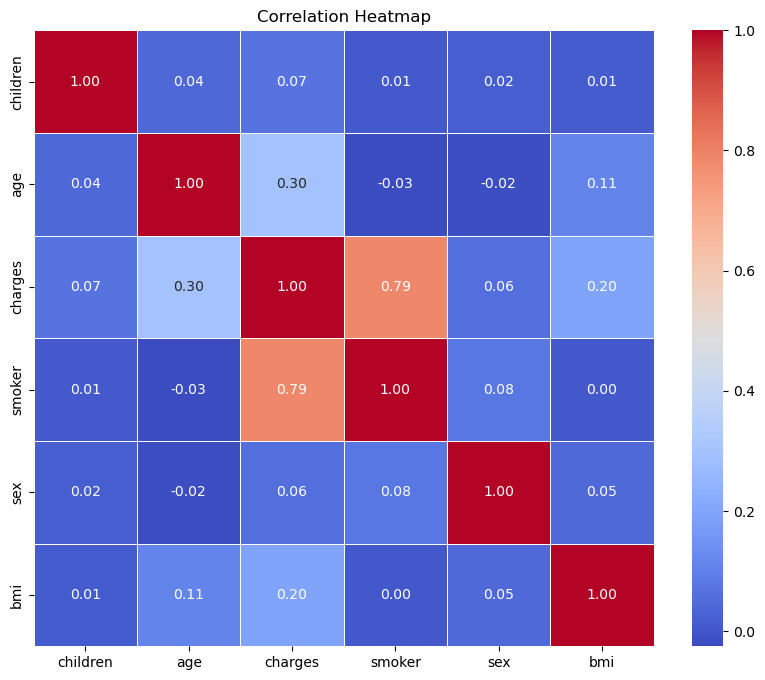

In [19]:
# Menghitung korelasi dengan heatmap 
data_temp = data.copy()
# Pilih kolom 'smoker', 'age', dan 'charges' dari dataframe
data_temp['smoker'] = data_temp['smoker'].map({'yes': 1, 'no': 0})
data_temp['sex'] = data_temp['sex'].map({'male': 1, 'female': 0})


selected_data = data_temp[['children', 'age', 'charges', 'smoker', 'sex','bmi']]

# Menghitung matriks korelasi
correlation_matrix = selected_data.corr()

# Menggunakan seaborn untuk membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()
                                                   

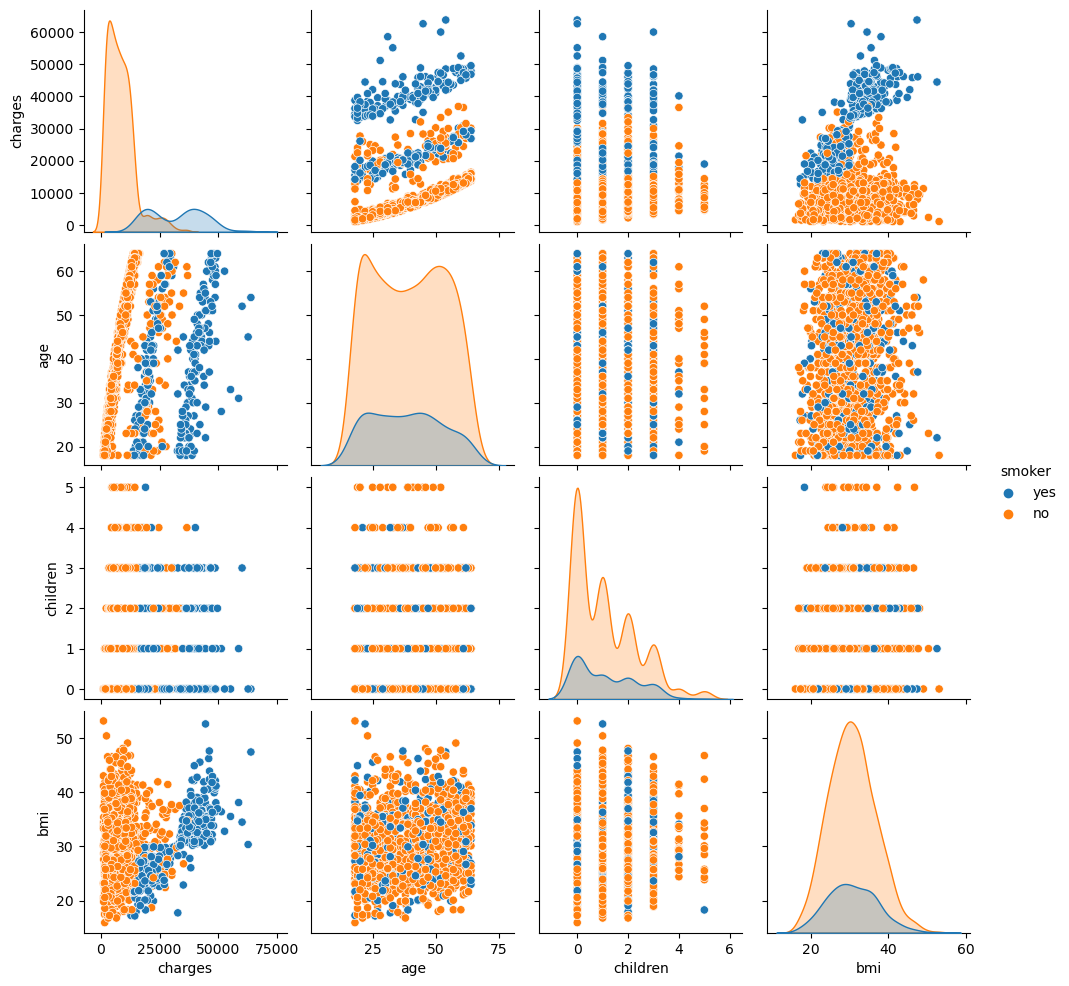

In [20]:
#Memvisualisasikan korelasi antar varabel dengan pairplot
sns.pairplot(data, vars=['charges', 'age', 'children', 'bmi'], hue='smoker')
plt.show()

### 5. Pengujian Hipotesis


In [21]:
# Memeriksa 3 hipotesis berikut:
# 1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non-perokok
# 2. Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25
# 3. Tagihan kesehatan laki-laki lebih besar dari perempuan

Diasumsikan data populasi berdistribusi normal dan pengujian statistik dengan z-test

In [22]:
#5.1 Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non-perokok

print('Uji hipotesis dengan dua mean')
print('H0: Rata-rata tagihan kesehatan perokok <= non-perokok')
print('H1: Rata-rata tagihan kesehatan perokok > non-perokok')


alpha = 0.05
charges_smoker_yes = data[data['smoker'] == 'yes']['charges']
n_yes = len(charges_smoker_yes)
mean_yes = charges_smoker_yes.mean()
std_yes = charges_smoker_yes.std()

charges_smoker_no = data[data['smoker'] == 'no']['charges']
mean_no = charges_smoker_no.mean()
n_no = len(charges_smoker_no)
std_no = charges_smoker_no.std()


# Menghitung z-statistic
denom_sqrt = np.sqrt((std_yes**2 / n_yes) + (std_no**2 / n_no))
z = (mean_yes - mean_no) / denom_sqrt

# Menghitung p-value (uji satu sisi pihak kanan (>))
p_value = 1 - norm.cdf(z)

# Menampilkan nilai z-statistic dan p-value
print(f'Nilai Z-statistic: {z}')
print(f'Nilai p-value: {p_value}')

# Kesimpulan
if p_value > alpha:
    print(f'Gagal tolak H0.')
    print('Kesimpulan: Tidak ada cukup bukti untuk menyatakan bahwa rata-rata tagihan kesehatan perokok lebih tinggi daripada rata-rata tagihan kesehatan non-perokok.')  
else:
    print(f'Tolak H0.')
    print('Kesimpulan: Rata-rata tagihan kesehatan perokok lebih tinggi daripada rata-rata tagihan kesehatan non-perokok.')
    



Uji hipotesis dengan dua mean
H0: Rata-rata tagihan kesehatan perokok <= non-perokok
H1: Rata-rata tagihan kesehatan perokok > non-perokok
Nilai Z-statistic: 32.75188776634183
Nilai p-value: 0.0
Tolak H0.
Kesimpulan: Rata-rata tagihan kesehatan perokok lebih tinggi daripada rata-rata tagihan kesehatan non-perokok.


In [49]:
#5.2 Tagihan kesehatan dengan BMI di atas 25 lebih tinggi daripada tagihan kesehatan dengan BMI di bawah 25

print('Uji hipotesis dengan dua mean')
print('H0: Rata-rata tagihan kesehatan dengan BMI di atas 25 <= tagihan kesehatan dengan BMI dibawah 25')
print('H1: Rata-rata tagihan kesehatan dengan BMI di atas 25 > tagihan kesehatan dengan BMI dibawah 25')

# Uji Pihak Kanan, "greater" 

charges_bmi_morethan25 = data[data['bmi'] > 25]['charges']
n_m25 = len(charges_bmi_morethan25)
mean_m25 = charges_bmi_morethan25.mean()
std_m25 = charges_bmi_morethan25.std()

charges_bmi_lessthan25 = data[data['bmi'] <= 25]['charges']
n_l25 = len(charges_bmi_lessthan25)
mean_l25 = charges_bmi_lessthan25.mean()
std_l25 = charges_bmi_lessthan25.std()


# Menghitung z-statistic
denom_sqrt3 = np.sqrt((std_m25**2 / n_m25) + (std_l25**2 / n_l25))
z3 = (mean_m25 - mean_l25) / denom_sqrt3


# Menghitung p-value (uji satu sisi pihak kanan (>))
p_value3 = 1-norm.cdf(z3)

# Menampilkan nilai z-statistic dan p-value
print(f'Nilai Z-statistic: {z3}')
print(f'Nilai p-value: {p_value3}')

if p_value3 > alpha:
    print("Gagal tolak H0 \nKesimpulan: Tidak ada cukup bukti bahwa rata-rata tagihan kesehatan dengan BMI di atas 25 lebih tinggi tagihan kesehatan dengan BMI dibawah 25 ")
else:
    print("Tolak H0 \nKesimpulan: Rata-rata tagihan kesehatan dengan BMI di atas 25 lebih tinggi tagihan kesehatan dengan BMI dibawah 25")



Uji hipotesis dengan dua mean
H0: Rata-rata tagihan kesehatan dengan BMI di atas 25 <= tagihan kesehatan dengan BMI dibawah 25
H1: Rata-rata tagihan kesehatan dengan BMI di atas 25 > tagihan kesehatan dengan BMI dibawah 25
Nilai Z-statistic: 5.953486371741479
Nilai p-value: 1.3124485942483943e-09
Tolak H0 
Kesimpulan: Rata-rata tagihan kesehatan dengan BMI di atas 25 lebih tinggi tagihan kesehatan dengan BMI dibawah 25


In [24]:
#5.3 Tagihan kesehatan laki-laki lebih besar dari perempuan

print('Uji hipotesis dengan dua mean')
print('H0: Rata-rata tagihan kesehatan laki-laki <= perempuan')
print('H1: Rata-rata tagihan kesehatan laki-laki > perempuan') 


charges_male = data[data['sex'] == 'male']['charges']
n_male = len(charges_male)
mean_male = charges_male.mean()
std_male = charges_male.std()

charges_female = data[data['sex'] == 'female']['charges']
n_female = len(charges_female)
mean_female = charges_female.mean()
std_female = charges_female.std()


# Menghitung z-statistic
denom_sqrt2 = np.sqrt((std_male**2 / n_male) + (std_female**2 / n_female))
z2 = (mean_male - mean_female) / denom_sqrt2


# Menghitung p-value (uji satu sisi pihak kanan (>))
p_value2 = 1 - norm.cdf(z2)

# Menampilkan nilai z-statistic dan p-value
print(f'Nilai Z-statistic: {z2}')
print(f'Nilai p-value: {p_value2}')

# Kesimpulan

if p_value2 > alpha:
    print("Gagal tolak H0 \nKesimpulan: Tidak cukup bukti bahwa rata-rata tagihan kesehatan laki-laki lebih tinggi dari perempuan")
else:
    print("Tolak H0 \nKesimpulan: Rata-rata tagihan kesehatan laki-laki lebih tinggi dari perempuan")


Uji hipotesis dengan dua mean
H0: Rata-rata tagihan kesehatan laki-laki <= perempuan
H1: Rata-rata tagihan kesehatan laki-laki > perempuan
Nilai Z-statistic: 2.1008878232359565
Nilai p-value: 0.01782540728946813
Tolak H0 
Kesimpulan: Rata-rata tagihan kesehatan laki-laki lebih tinggi dari perempuan
